In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [6]:
df = pd.read_csv('dataset.csv', sep=';')

In [7]:
df.head(10)

,status_conta,duracao_mes,hist_credito,proposito_cred,quantia_credito,conta,emprego_atual_desde,porc_taxa_parcelamento,status_genero,outros_devedores,...,propriedade,idade,outros_planos_parcelamento,tipo_habitacao,num_creditos_banco,trabalho,num_pessoas_relacionadas,possui_telefone,trabalhador_estrangeiro,confiavel
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


# Análise Exploratória de Dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   status_conta                1000 non-null   object
 1   duracao_mes                 1000 non-null   int64 
 2   hist_credito                1000 non-null   object
 3   proposito_cred              1000 non-null   object
 4   quantia_credito             1000 non-null   int64 
 5   conta                       1000 non-null   object
 6   emprego_atual_desde         1000 non-null   object
 7   porc_taxa_parcelamento      1000 non-null   int64 
 8   status_genero               1000 non-null   object
 9   outros_devedores            1000 non-null   object
 10  resid_atual_desde           1000 non-null   int64 
 11  propriedade                 1000 non-null   object
 12  idade                       1000 non-null   int64 
 13  outros_planos_parcelamento  1000 non-null   objec

In [9]:
df.corr()

,duracao_mes,quantia_credito,porc_taxa_parcelamento,resid_atual_desde,idade,num_creditos_banco,num_pessoas_relacionadas,confiavel
duracao_mes,1.000000,0.624984,0.080873,0.033797,-0.034179,-0.011284,-0.023834,0.210222
quantia_credito,0.624984,1.000000,-0.264304,0.025907,0.036604,0.020795,0.017142,0.143155
porc_taxa_parcelamento,0.080873,-0.264304,1.000000,0.046419,0.055577,0.024452,-0.072439,0.080527
resid_atual_desde,0.033797,0.025907,0.046419,1.000000,0.264935,0.090165,0.042984,0.003252
idade,-0.034179,0.036604,0.055577,0.264935,1.000000,0.148720,0.117893,-0.089239
num_creditos_banco,-0.011284,0.020795,0.024452,0.090165,0.148720,1.000000,0.109667,-0.044236
num_pessoas_relacionadas,-0.023834,0.017142,-0.072439,0.042984,0.117893,0.109667,1.000000,-0.002082
confiavel,0.210222,0.143155,0.080527,0.003252,-0.089239,-0.044236,-0.002082,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AB2507BC8>,
      dtype=object)

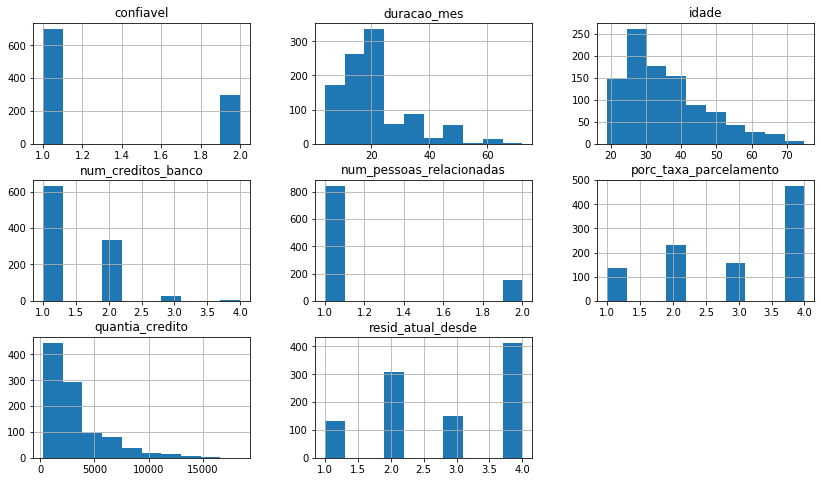

In [13]:
df.hist(figsize=(14,8))

# Definir Treino e Teste

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df.drop('confiavel', axis=1), df.confiavel, test_size = 0.3)

# Pré-processamento

In [25]:
cat_cols = [column for column in x_treino.columns if x_treino[column].dtype == object]
num_cols = [column for column in x_treino.columns if x_treino[column].dtype == 'int64'] 
print(cat_cols, len(cat_cols))
print(num_cols, len(num_cols))

['status_conta', 'hist_credito', 'proposito_cred', 'conta', 'emprego_atual_desde', 'status_genero', 'outros_devedores', 'propriedade', 'outros_planos_parcelamento', 'tipo_habitacao', 'trabalho', 'possui_telefone', 'trabalhador_estrangeiro'] 13
['duracao_mes', 'quantia_credito', 'porc_taxa_parcelamento', 'resid_atual_desde', 'idade', 'num_creditos_banco', 'num_pessoas_relacionadas'] 7


In [26]:
num_preprocess = Pipeline([('scaler', StandardScaler())])
cat_preprocess = Pipeline([('one_hot', OneHotEncoder())])
preprocess = ColumnTransformer([('numerical', num_preprocess, num_cols), ('categorical', cat_preprocess, cat_cols)])

# Modelagem

In [31]:
def create_model(model, prep = None):
    if preprocess:
        return Pipeline([('preprocess',prep), ('model',model)])
    else:
        return model

In [44]:
decision_tree = create_model(DecisionTreeClassifier(), preprocess)
log_reg = create_model(LogisticRegression(), preprocess)

In [45]:
decision_tree.fit(x_treino,y_treino)
log_reg.fit(x_treino,y_treino)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['duracao_mes',
                                                   'quantia_credito',
                                                 

# Avaliação

In [46]:
tree_prediction = decision_tree.predict(x_teste)
log_reg_prediction = log_reg.predict(x_teste)

===DECISION TREE===
Acc: 0.6666666666666666	 Precision: 0.7378640776699029	 Recall: 0.7676767676767676	 F1: 0.7524752475247525


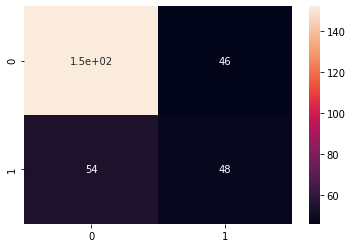

===LOGISTIC REGRESSION===
Acc: 0.7233333333333334	 Precision: 0.7601809954751131	 Recall: 0.8484848484848485	 F1: 0.8019093078758949


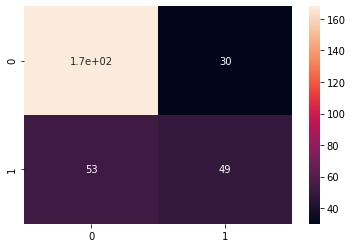

In [66]:
print('===DECISION TREE===')
print('Acc: {}\t Precision: {}\t Recall: {}\t F1: {}'
      .format(accuracy_score(y_teste, tree_prediction), precision_score(y_teste, tree_prediction), recall_score(y_teste, tree_prediction), f1_score(y_teste, tree_prediction)))
#print(confusion_matrix(y_teste, tree_prediction))

tn, fp, fn, tp = confusion_matrix(y_teste, tree_prediction).ravel()
sns.heatmap([[tn,fp],[fn,tp]], annot=True)
plt.show()


print('===LOGISTIC REGRESSION===')
print('Acc: {}\t Precision: {}\t Recall: {}\t F1: {}'
      .format(accuracy_score(y_teste, log_reg_prediction), precision_score(y_teste, log_reg_prediction), recall_score(y_teste, log_reg_prediction), f1_score(y_teste, log_reg_prediction)))
#print(confusion_matrix(y_teste, log_reg_prediction))

tn, fp, fn, tp = confusion_matrix(y_teste, log_reg_prediction).ravel()
sns.heatmap([[tn,fp],[fn,tp]], annot=True)
plt.show()

In [62]:
print(classification_report(y_teste, tree_prediction))
print(classification_report(y_teste, log_reg_prediction))

              precision    recall  f1-score   support

           1       0.74      0.77      0.75       198
           2       0.51      0.47      0.49       102

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.67      0.66       300

              precision    recall  f1-score   support

           1       0.76      0.85      0.80       198
           2       0.62      0.48      0.54       102

    accuracy                           0.72       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.71      0.72      0.71       300

